In [2]:
import numpy as np

# Number of points you want to generate
num_points = 10

# Generate linearly spaced y-values between 0 and 5
y_values = np.linspace(0, 5, num_points)

# Create pairs of (0, y) where y is a value from y_values
pairs = [np.array([0, y]) for y in y_values]

# Print the result
for pair in pairs:
    print(pair)
pairs[-1]

[0. 0.]
[0.         0.55555556]
[0.         1.11111111]
[0.         1.66666667]
[0.         2.22222222]
[0.         2.77777778]
[0.         3.33333333]
[0.         3.88888889]
[0.         4.44444444]
[0. 5.]


array([0., 5.])

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circle(radius, num_points):
    """
    Generate points describing a circle.
    
    Parameters:
    radius (float): The radius of the circle.
    num_points (int): The number of points to generate along the circle.
    
    Returns:
    list of numpy arrays: A list of ordered pairs (x, y) as numpy arrays describing the circle.
    """
    angles = np.linspace(0, 2 * np.pi, num_points)
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    circle_points = [np.array([x[i], y[i]]) for i in range(num_points)]
    return circle_points

# Parameters
radius = 2
num_points = 100

# Generate circle points
circle_points = generate_circle(radius, num_points)

# # Print the circle points
# for point in circle_points:
#     print(point)

# Save the circle points to a .npy file
np.save('circle_points.npy', circle_points)

# # Plot the circle
# x, y = zip(*circle_points)
# x = [p[0] for p in circle_points]
# y = [p[1] for p in circle_points]
# plt.figure()
# plt.plot(x, y, 'o')
# plt.title("Circle with Radius = {}".format(radius))
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.axis('equal')
# plt.grid(True)
# plt.show()



In [4]:
import numpy as np 
import math
yaw = math.atan2(-0.001, 0.1487)
yaw 

-0.006724848187134084

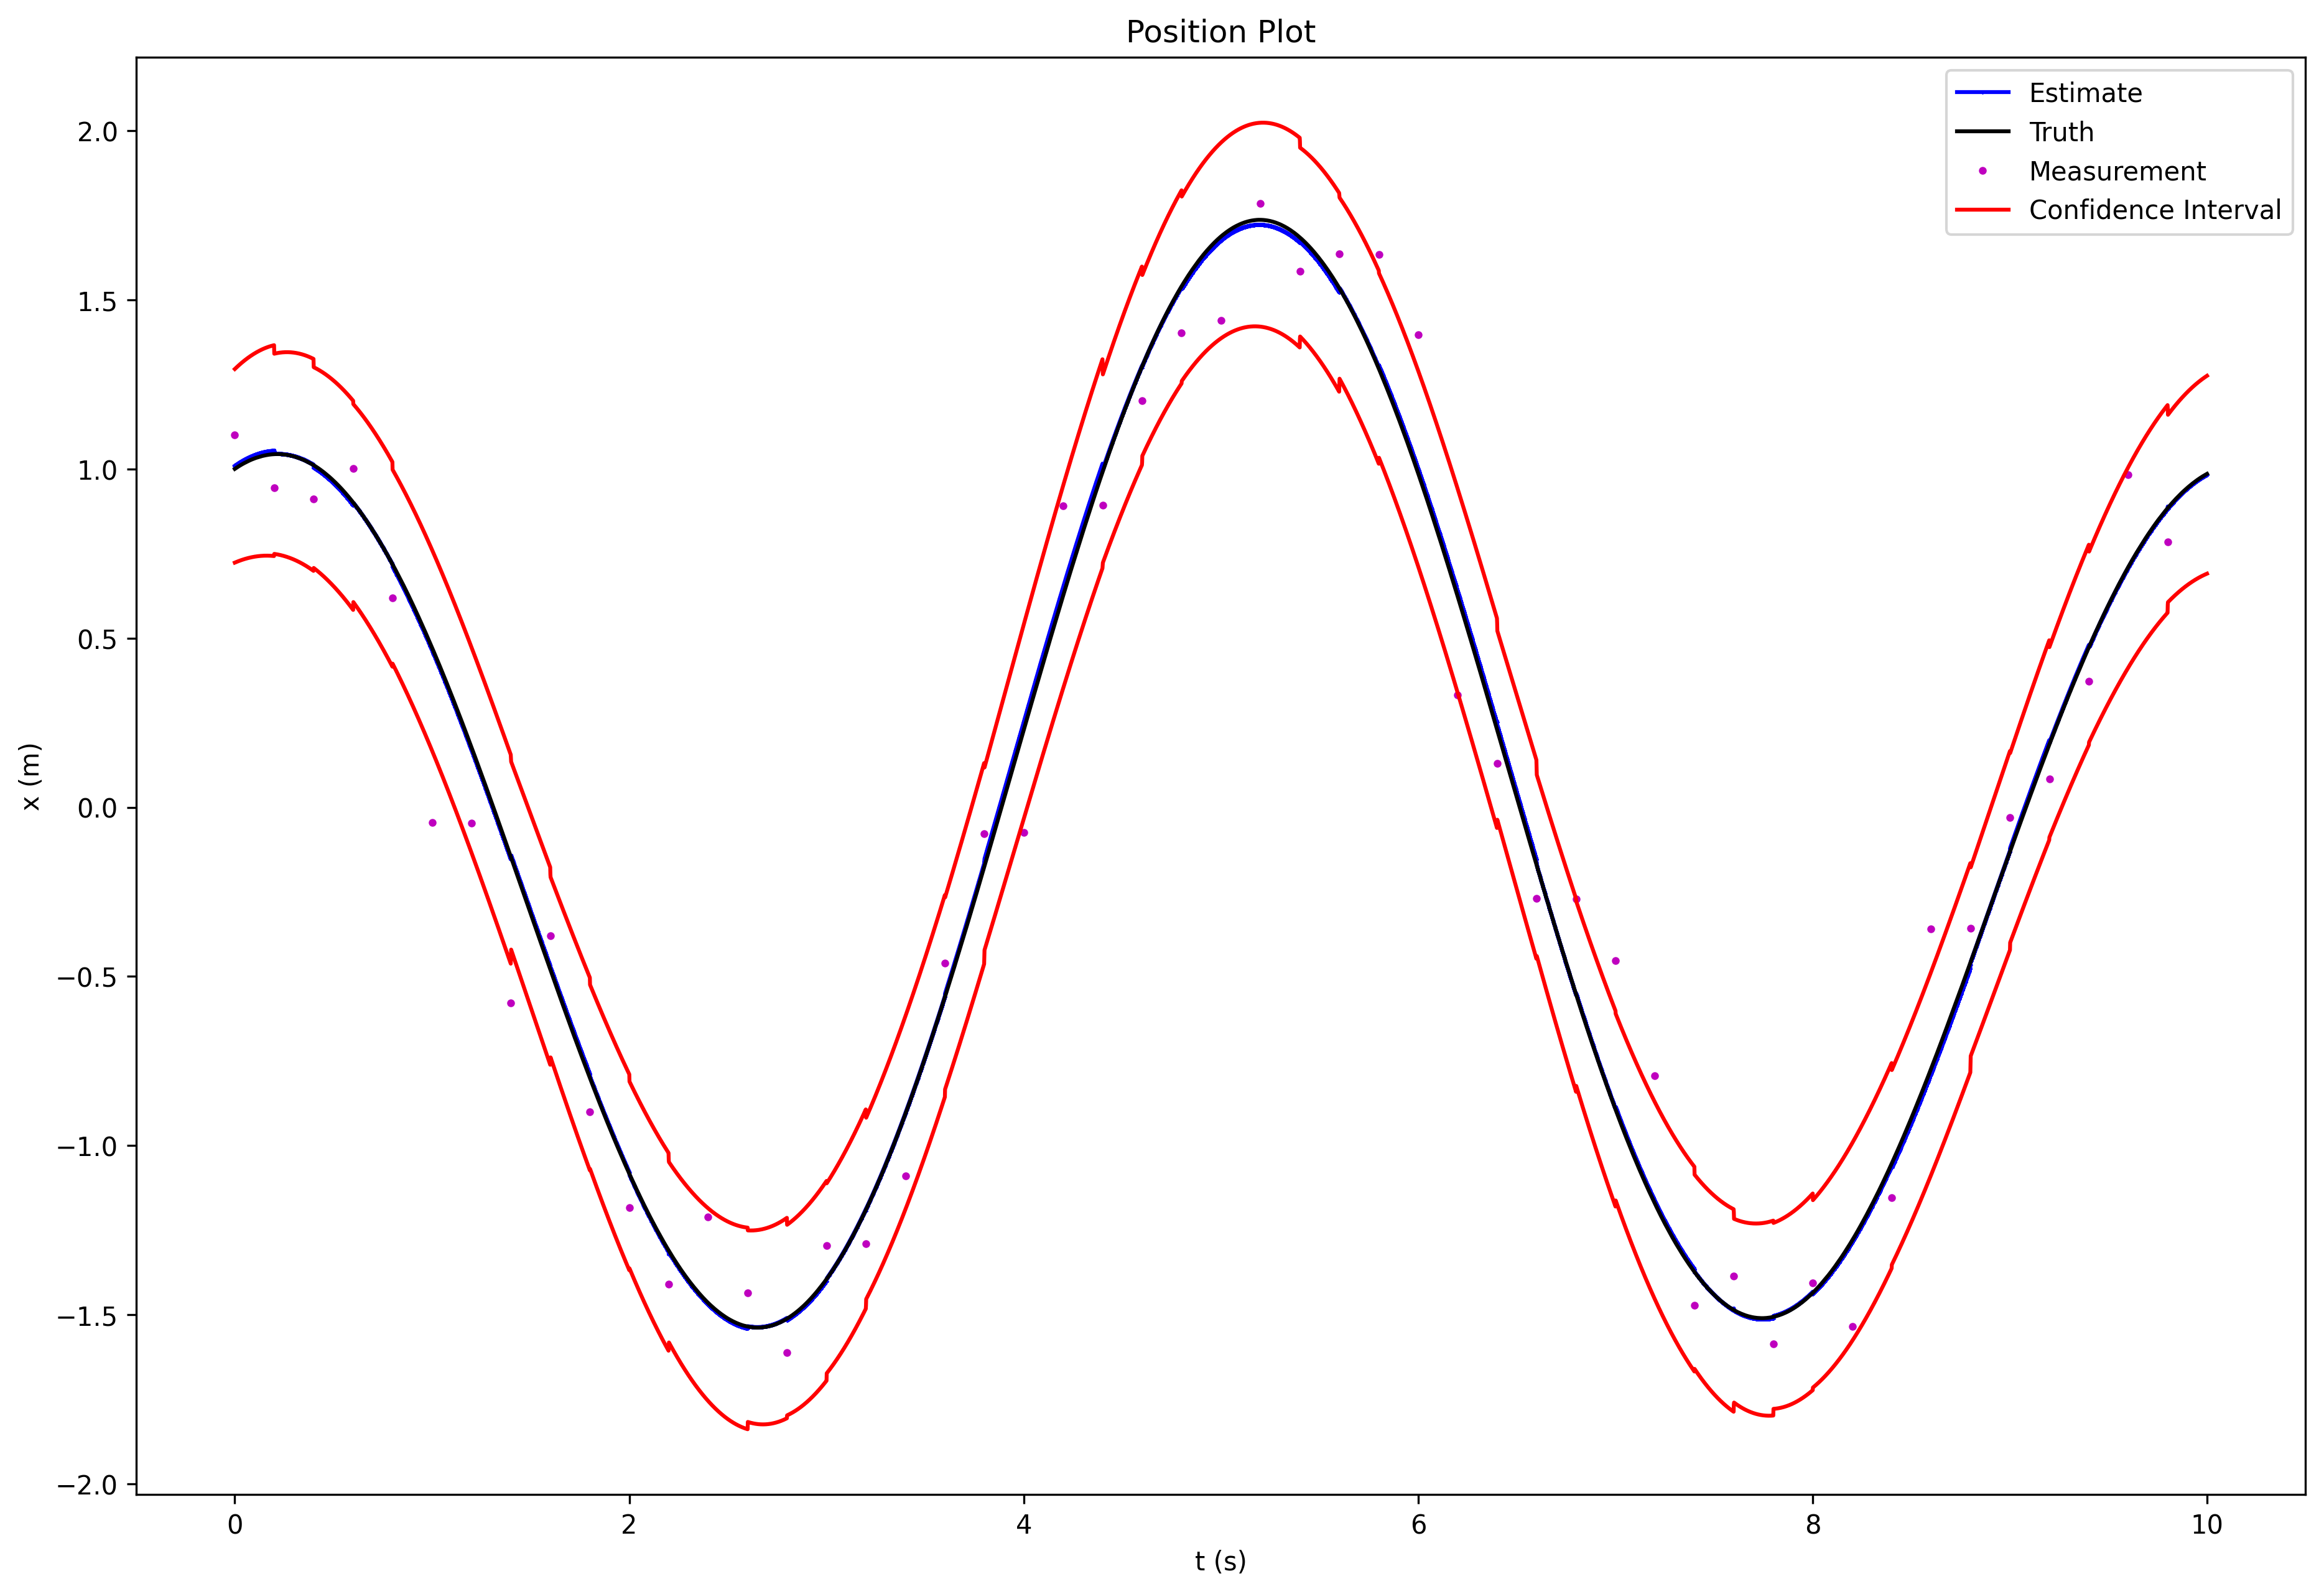

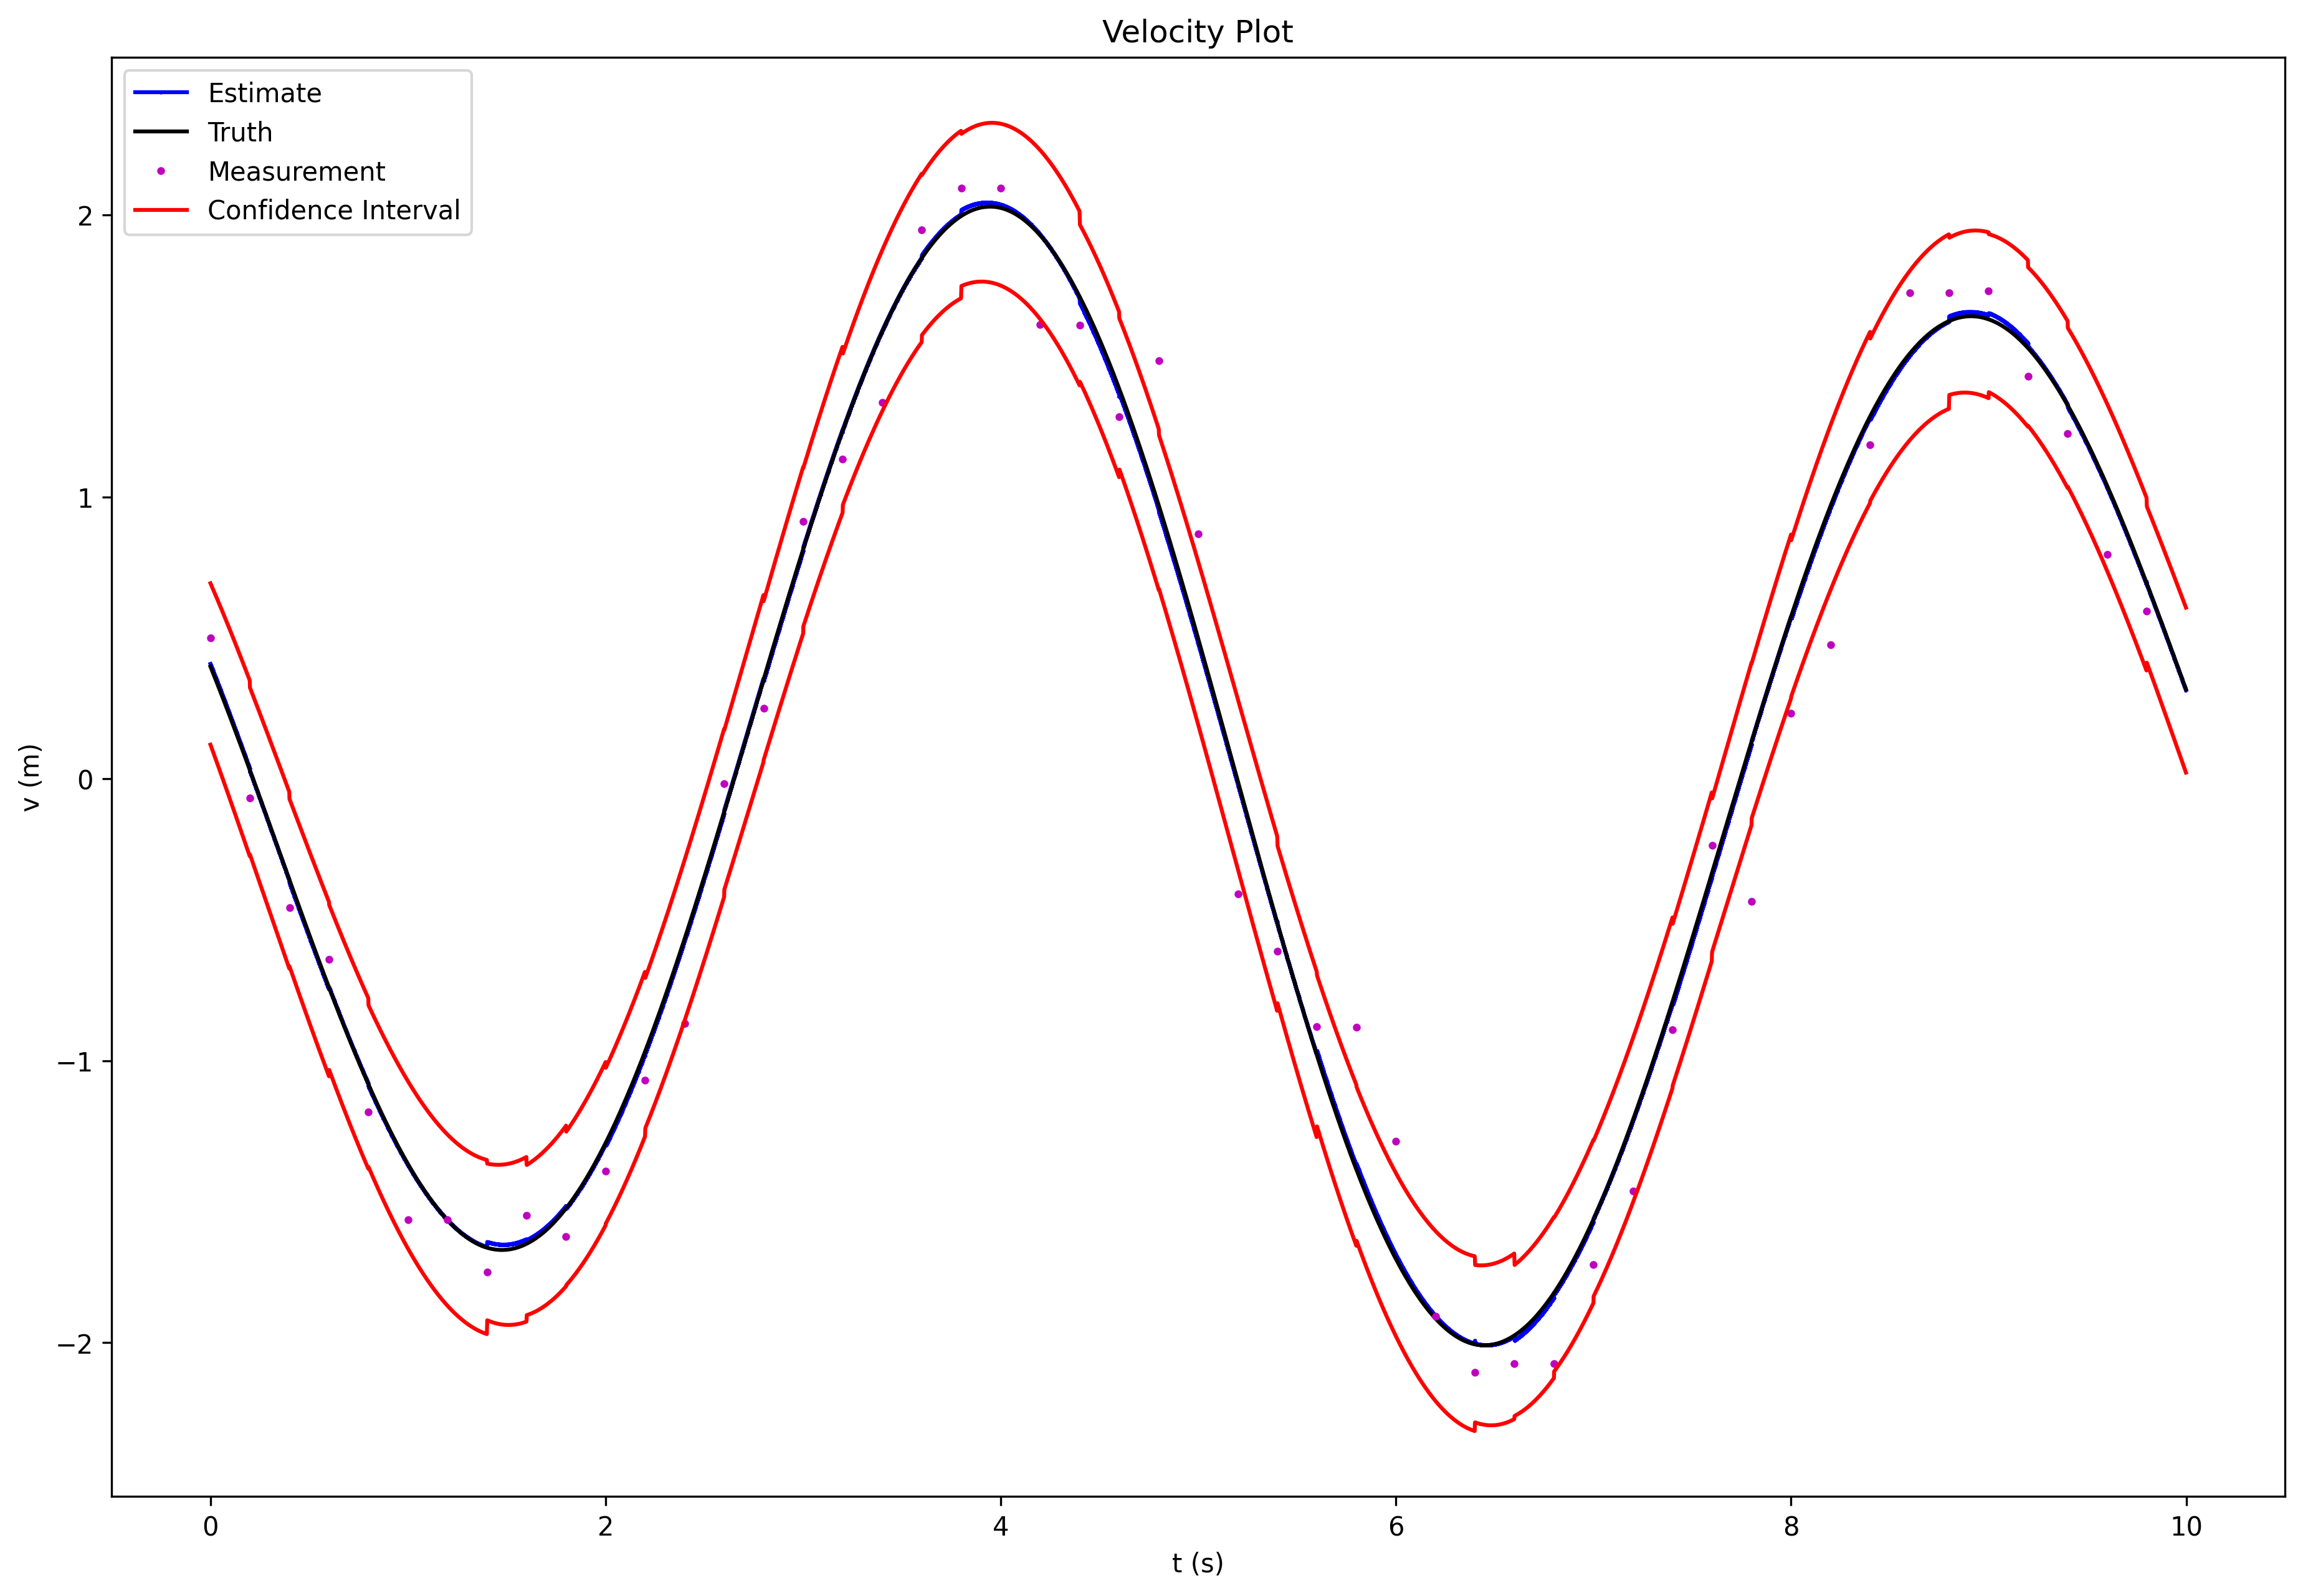

In [5]:
# Clear variables
%reset -f
# Enable interactive plots
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# Clear plots
plt.close('all')

# Establish Dynamic System
h = np.array([0.4, 0.2, 0.7])  # [m,c,k]
dt = 1e-3  # propagation period
dn = 0.20  # measurement period
T = 10     # full time for simulation

# Mass Spring Damper System
A = np.array([
    [0, 1],
    [-h[2]/h[0], -h[1]/h[0]]
])
B = np.array([
    [0],
    [1/h[0]]
])
F = np.eye(2) + A * dt
G = B * dt
H = np.eye(2)

# Initialize Kalman Filter
P = (1e-2) * np.eye(2)
Q = (1e-5) * np.eye(2)
R = (1e-1) * np.eye(2)

# Control gain
k = 0.2

# Simulate the system with the controller and the filter
X = []
Z = []
C = []
rr = []
u = 0
x_last = np.array([1, 0.4])
P_last = P
r_last = x_last

for t in np.arange(0, T, dt):
    # Get the force input
    # f = np.sin(t) + u
    f = u

    # Predict
    x_next = F @ x_last + G.flatten() * f
    P_next = F @ P_last @ F.T + Q

    # Truth
    r_next = F @ r_last + G.flatten() * f + Q[0, 0] * np.random.randn(2)

    if t % dn < dt:  # Check if it's measurement time
        # Fake a measurement
        # z = r_last + R[0, 0] * np.random.randn(2)
        z = r_last + R[0, 0] * np.random.choice([1, -1])
        Z.append(z)

        # Update
        z_err = z - H @ x_next
        S = H @ P_next @ H.T + R
        K = P_next @ H.T @ np.linalg.inv(S)
        x_next = x_next + K @ z_err
        P_next = (np.eye(2) - K @ H) @ P_next

    # Determine the control action
    pd = np.sin(0.9 * t)
    p = x_next[1]
    u = -k * (pd - p)

    # Update for sim
    x_last = x_next
    P_last = P_next
    r_last = r_next

    # Store data for plots
    X.append(x_next)
    C.append(P_next[0, 0])
    rr.append(r_next)

# Convert lists to arrays
X = np.array(X) 
Z = np.array(Z)
C = np.array(C)
rr = np.array(rr)

# Plot
plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
plt.plot(np.arange(0, T, dt), X[:, 0], 'b-*', markersize=1, label='Estimate')
plt.plot(np.arange(0, T, dt), rr[:, 0], 'k', label='Truth')
plt.plot(np.arange(0, T, dn), Z[:, 0], 'm', markersize=2, marker='o', linestyle='none', label='Measurement')
plt.plot(np.arange(0, T, dt), X[:, 0] + 3 * np.sqrt(C), 'r', label='Confidence Interval')
plt.plot(np.arange(0, T, dt), X[:, 0] - 3 * np.sqrt(C), 'r')
plt.title("Position Plot")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.legend()

plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
plt.plot(np.arange(0, T, dt), X[:, 1], 'b-*', markersize=1, label='Estimate')
plt.plot(np.arange(0, T, dt), rr[:, 1], 'k', label='Truth')
plt.plot(np.arange(0, T, dn), Z[:, 1], 'm', markersize=2, marker='o', linestyle='none', label='Measurement')
plt.plot(np.arange(0, T, dt), X[:, 1] + 3 * np.sqrt(C), 'r', label='Confidence Interval')
plt.plot(np.arange(0, T, dt), X[:, 1] - 3 * np.sqrt(C), 'r')
plt.title("Velocity Plot")
plt.ylabel("v (m)")
plt.xlabel("t (s)")
plt.legend()

plt.show()


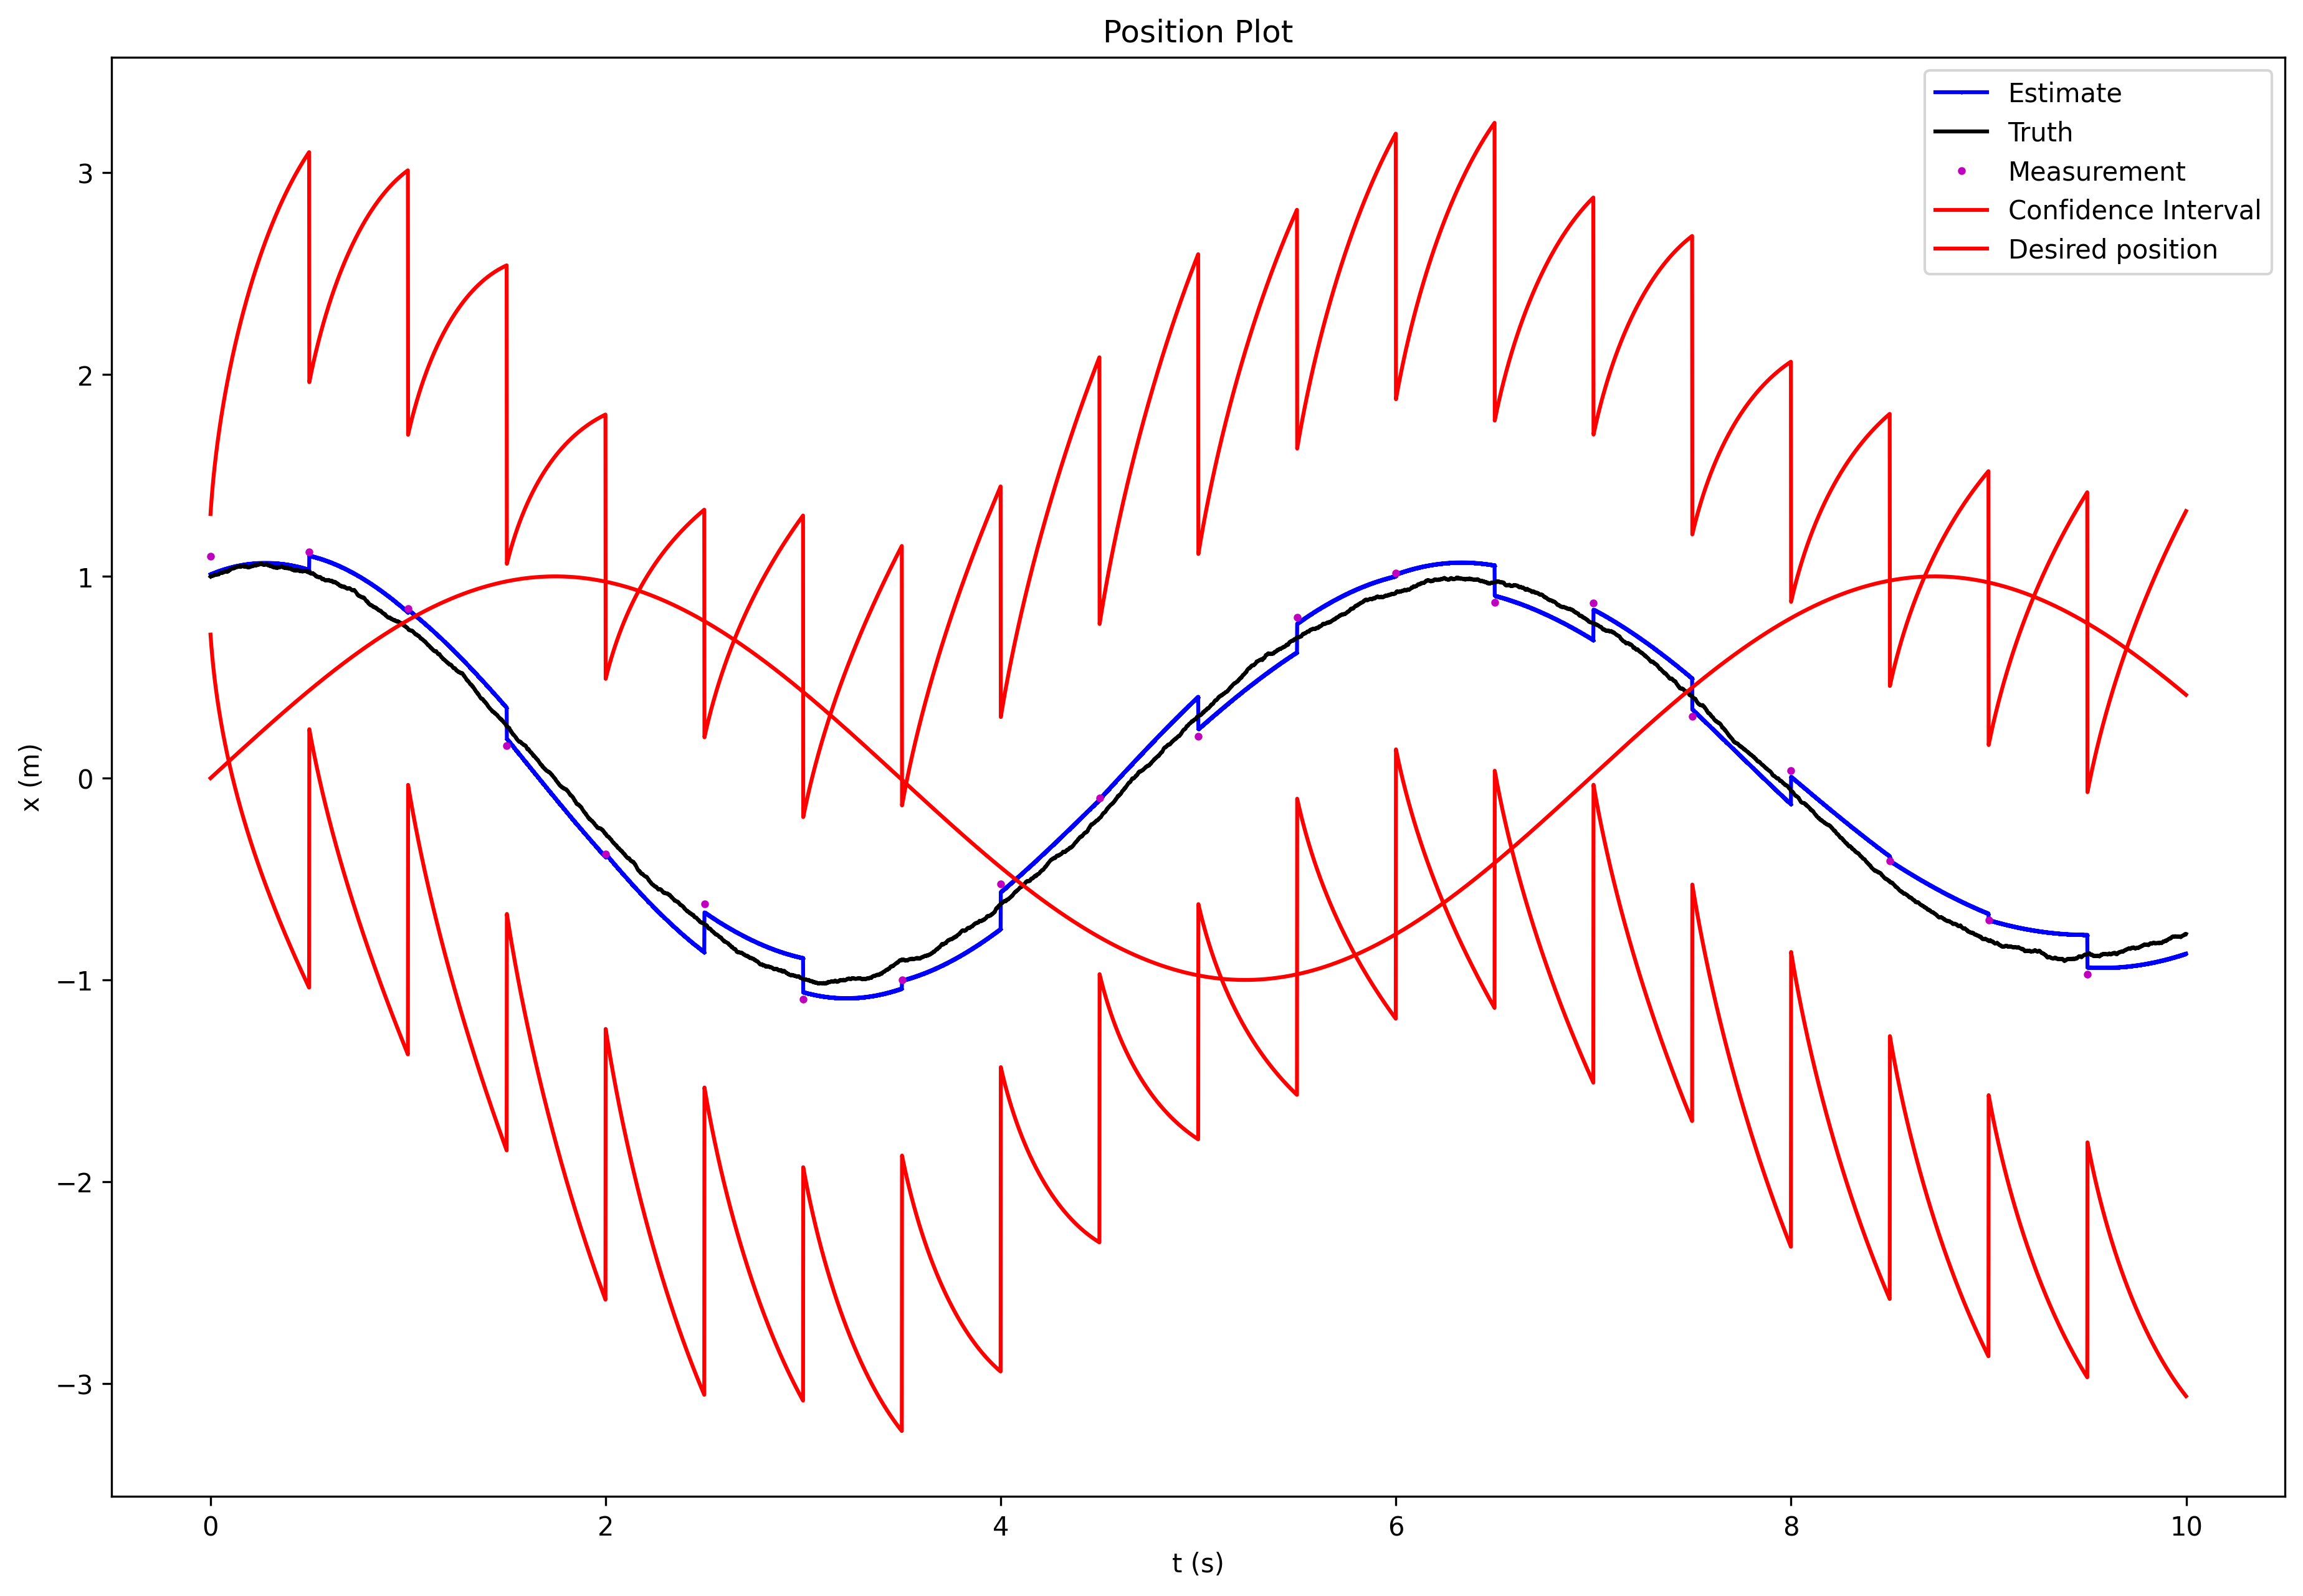

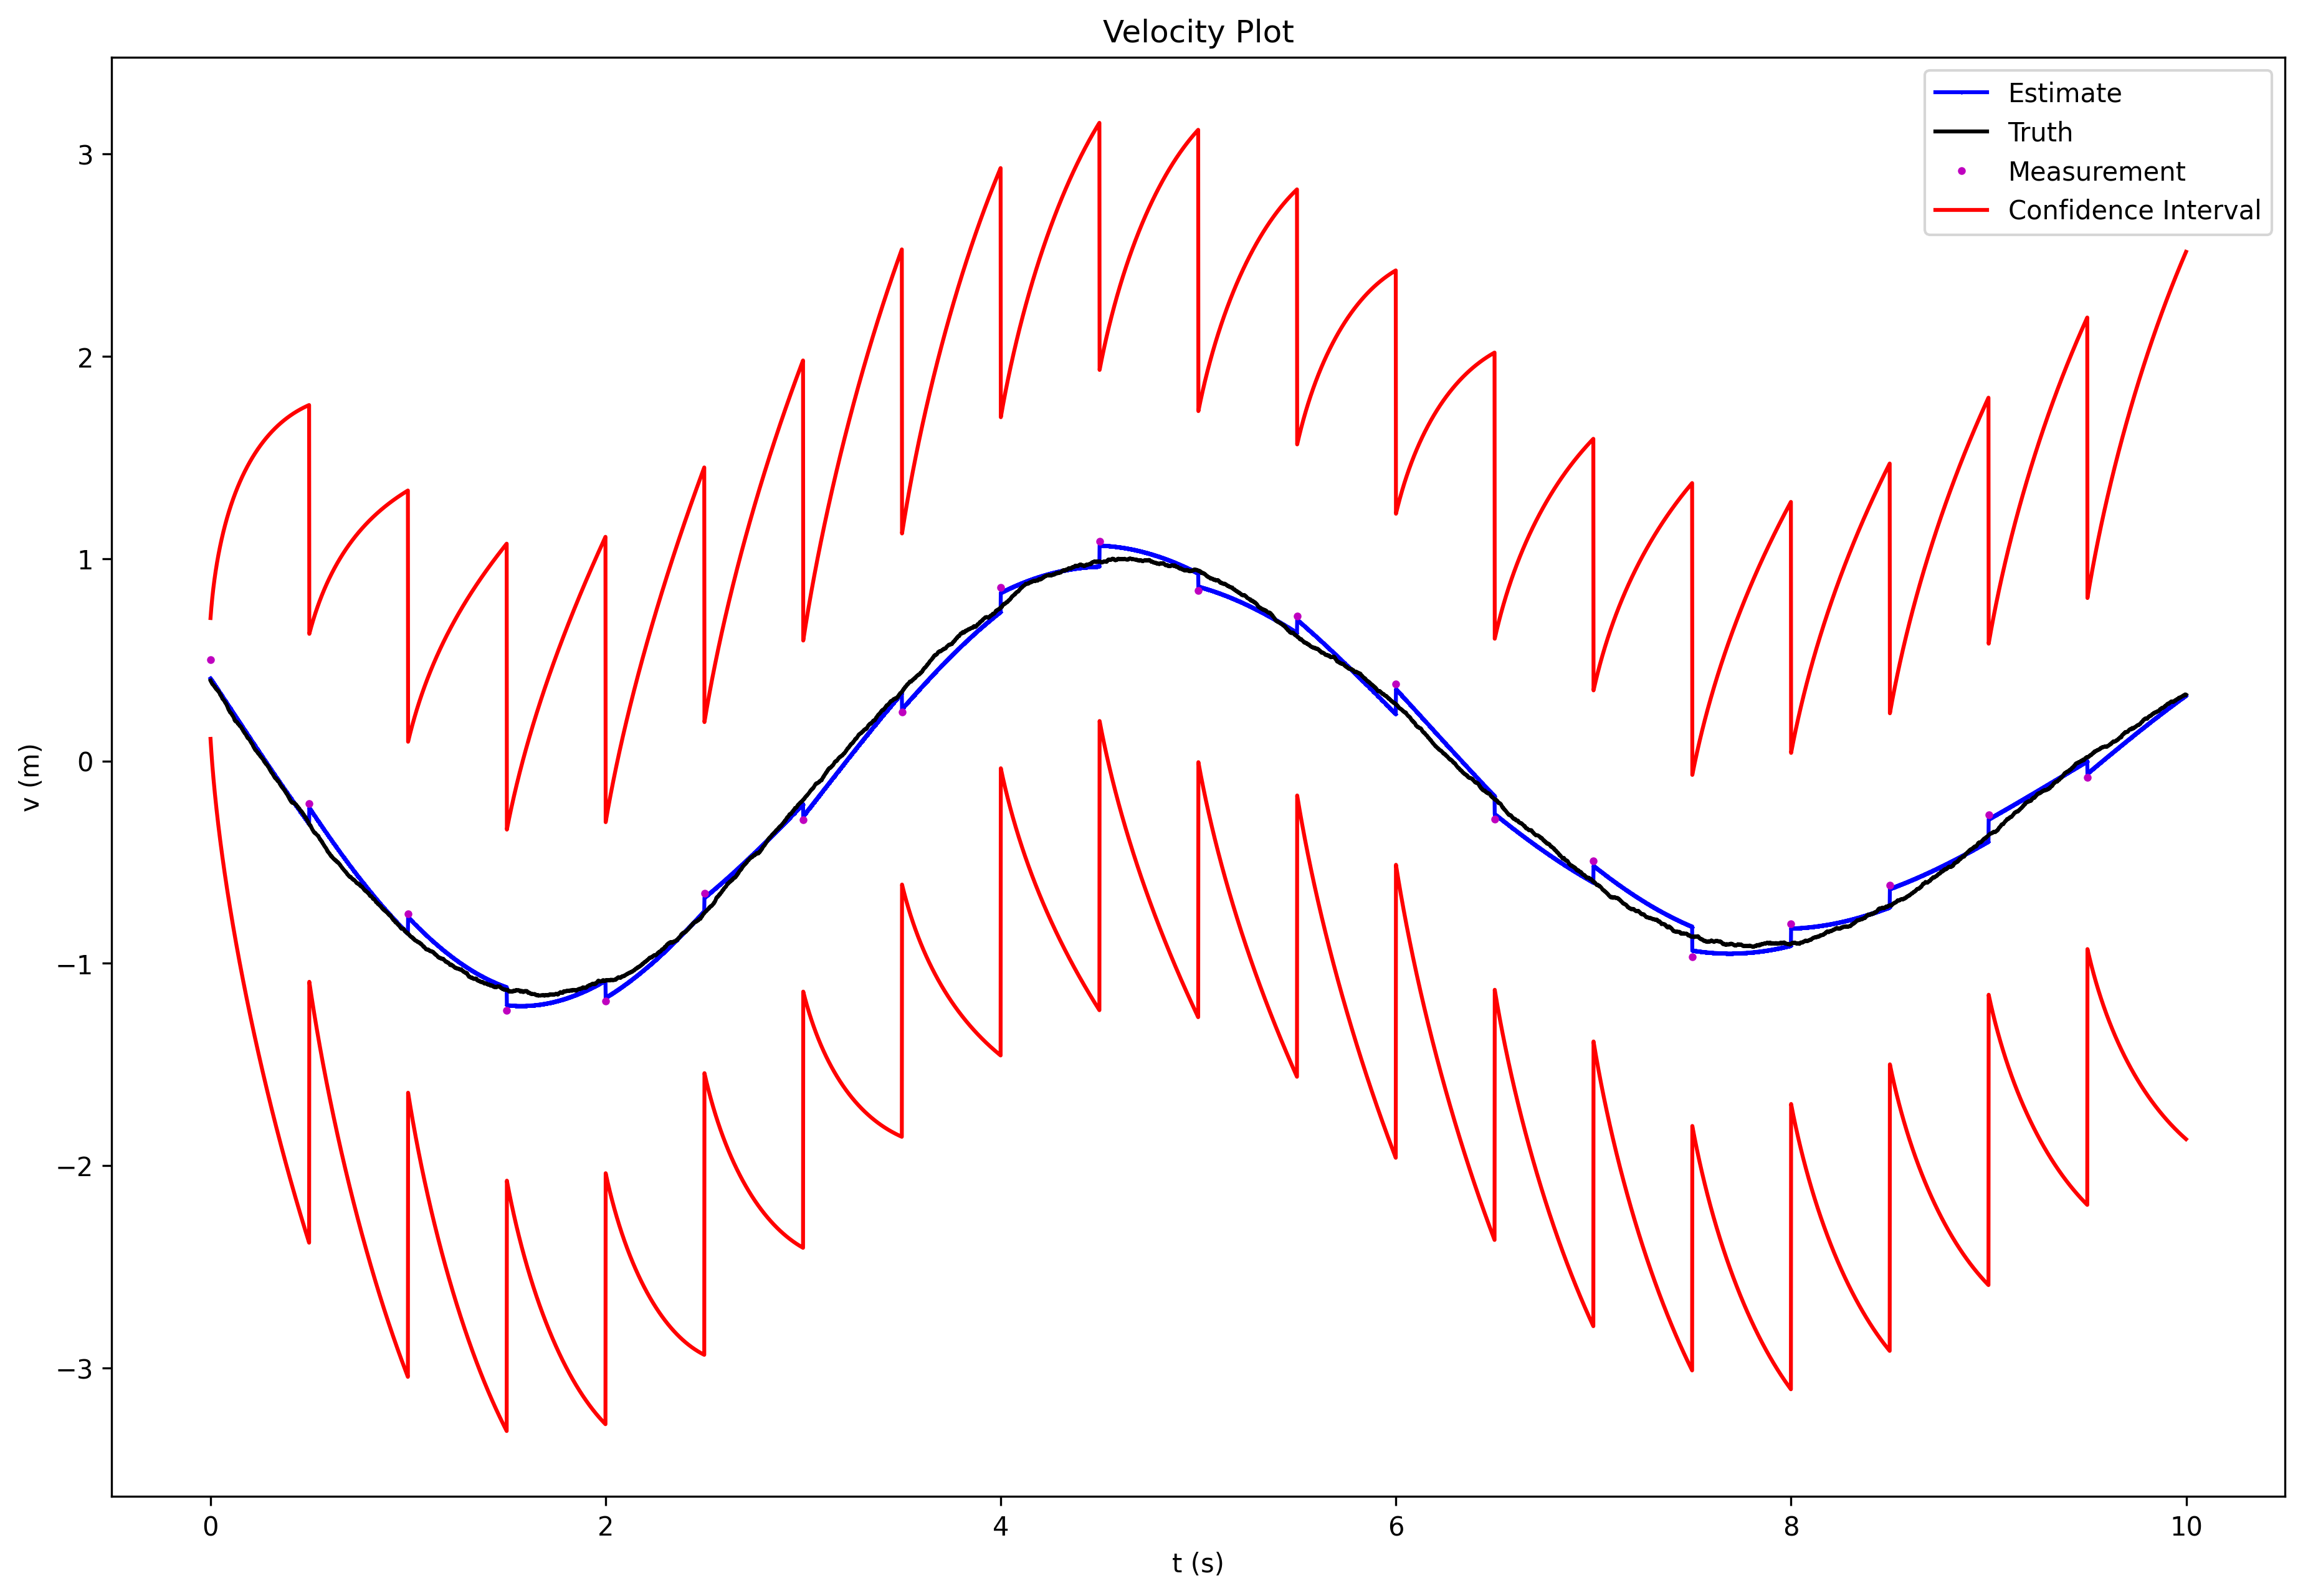

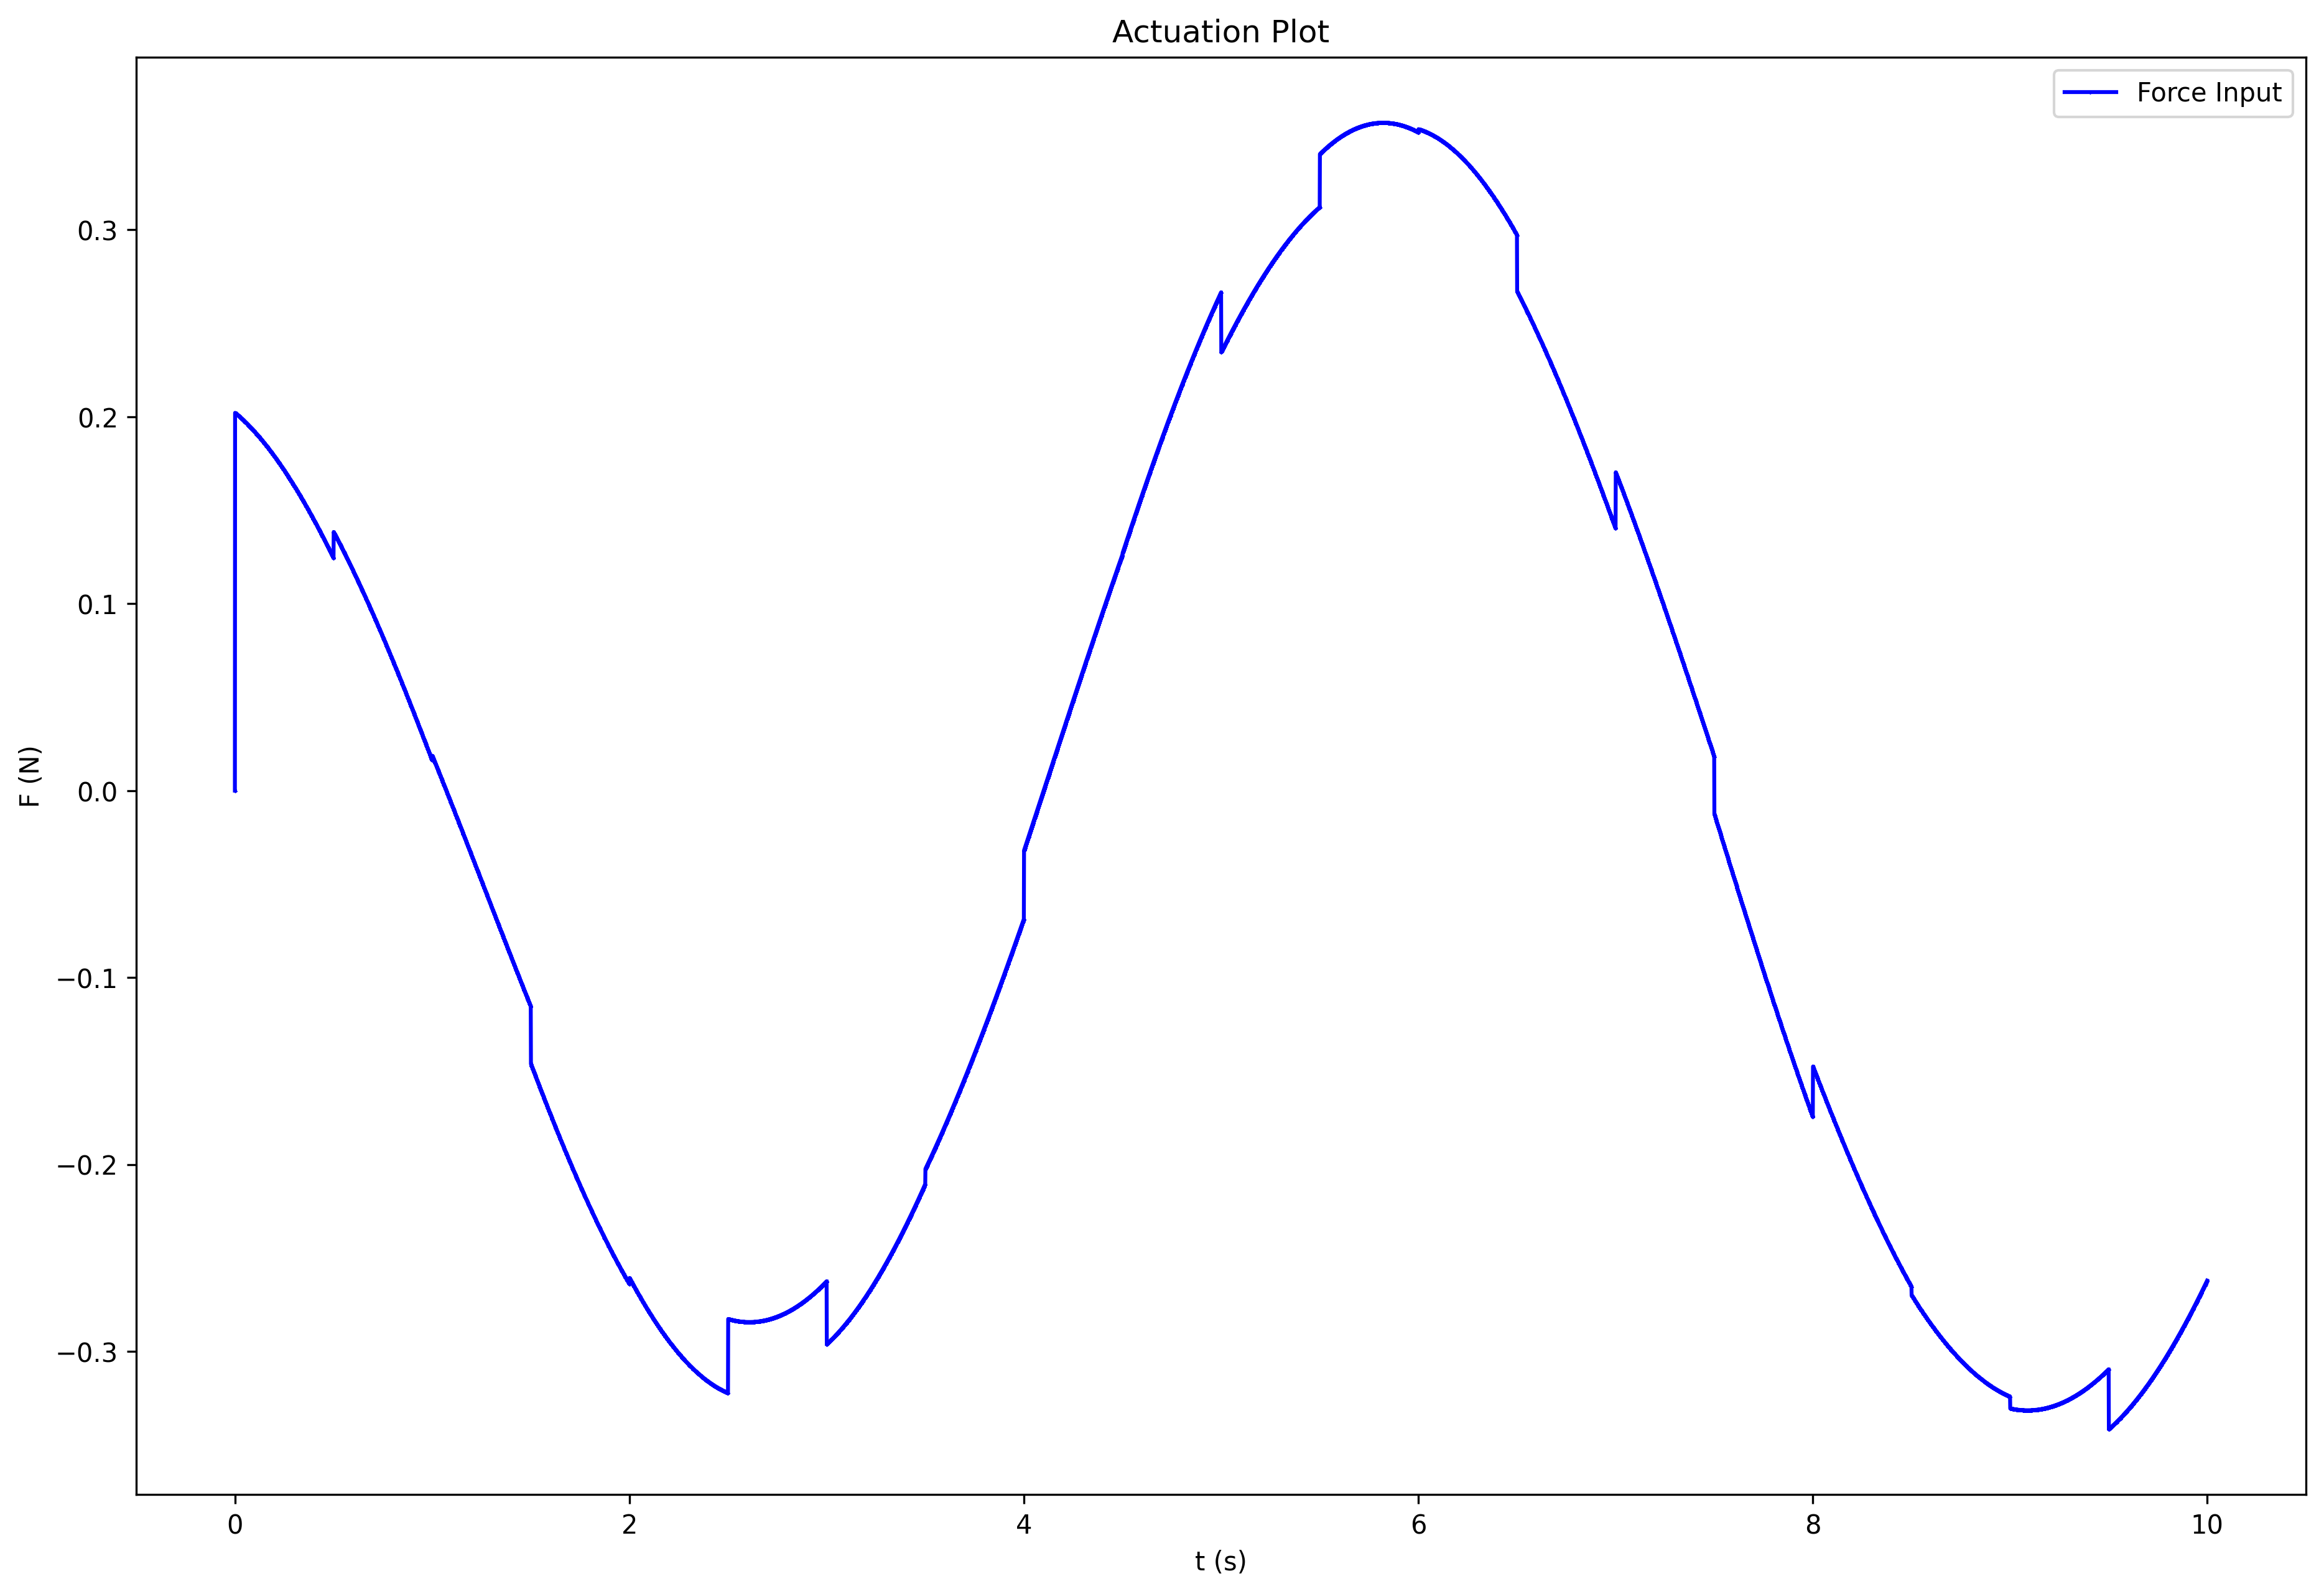

In [6]:
# Clear variables
%reset -f
# Enable interactive plots
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# Clear plots
plt.close('all')

# Establish Dynamic System
h = np.array([0.4, 0.2, 0.7])  # [m,c,k]
dt = 1e-3  # propagation period
dn = 0.50  # measurement period
T = 10     # full time for simulation

# Mass Spring Damper System
A = np.array([
    [0, 1],
    [-h[2]/h[0], -h[1]/h[0]]
])
B = np.array([
    [0],
    [1/h[0]]
])
F = np.eye(2) + A * dt
G = B * dt
H = np.eye(2)

# Initialize Kalman Filter
P = (1e-2) * np.eye(2) # covariance of estimates    
Q = (1e-3) * np.eye(2) # uncertainty of dynamics (process)
R = (1e-1) * np.eye(2) # uncertainty of measurements

# Control gain
k = 0.2

# Simulate the system with the controller and the filter
X = []
Z = []
C = []
rr = []
Force  = []

u = 0
x_last = np.array([1, 0.4])
P_last = P
r_last = x_last

for t in np.arange(0, T, dt):
    # Get the force input
    f = 1e-2 * np.sin(t) + u
    # f = u
    Force.append(f)
    # Predict
    x_next = F @ x_last + G.flatten() * f
    P_next = F @ P_last @ F.T + Q

    # Truth
    r_next = F @ r_last + G.flatten() * f + Q[0, 0] * np.random.randn(2)

    if t % dn < dt/10:  # Check if it's measurement time
        # print(f'current time is {t}')
        # Fake a measurement
        # z = r_last + R[0, 0] * np.random.randn(2)
        z = r_last + R[0, 0] * np.random.choice([1, -1])
        Z.append(z)
        # Update
        z_err = z - H @ x_next
        S = H @ P_next @ H.T + R
        K = P_next @ H.T @ np.linalg.inv(S)
        x_next = x_next + K @ z_err
        P_next = (np.eye(2) - K @ H) @ P_next

    # Determine the control action
    pd = np.sin(0.9 * t)
    p = x_next[0]
    u = -k * (pd - p)

    # Update for sim
    x_last = x_next
    P_last = P_next
    r_last = r_next

    # Store data for plots
    X.append(x_next)
    C.append(P_next[0, 0])
    rr.append(r_next)

# Convert lists to arrays
X = np.array(X) 
Z = np.array(Z)
C = np.array(C)
rr = np.array(rr)
Force  = np.array(Force)

# Plot
plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
plt.plot(np.arange(0, T, dt), X[:, 0], 'b-*', markersize=1, label='Estimate')
plt.plot(np.arange(0, T, dt), rr[:, 0], 'k', label='Truth')
plt.plot(np.arange(0, T, dn), Z[:, 0], 'm', markersize=2, marker='o', linestyle='none', label='Measurement')
plt.plot(np.arange(0, T, dt), X[:, 0] + 3 * np.sqrt(C), 'r', label='Confidence Interval')
plt.plot(np.arange(0, T, dt), X[:, 0] - 3 * np.sqrt(C), 'r')
plt.plot(np.arange(0, T, dt), np.sin(0.9 * np.arange(0, T, dt)), 'r', label='Desired position')
plt.title("Position Plot")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.legend()

plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
plt.plot(np.arange(0, T, dt), X[:, 1], 'b-*', markersize=1, label='Estimate')
plt.plot(np.arange(0, T, dt), rr[:, 1], 'k', label='Truth')
plt.plot(np.arange(0, T, dn), Z[:, 1], 'm', markersize=2, marker='o', linestyle='none', label='Measurement')
plt.plot(np.arange(0, T, dt), X[:, 1] + 3 * np.sqrt(C), 'r', label='Confidence Interval')
plt.plot(np.arange(0, T, dt), X[:, 1] - 3 * np.sqrt(C), 'r')
# plt.plot(np.arange(0, T, dt), np.sin(0.9 * np.arange(0, T, dt)), 'r', label='Desired Velocity')
plt.title("Velocity Plot")
plt.ylabel("v (m)")
plt.xlabel("t (s)")
plt.legend()

plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
plt.plot(np.arange(0, T, dt), Force, 'b-*', markersize=1, label='Force Input')
plt.title("Actuation Plot")
plt.ylabel("F (N)")
plt.xlabel("t (s)")
plt.legend()

plt.show()

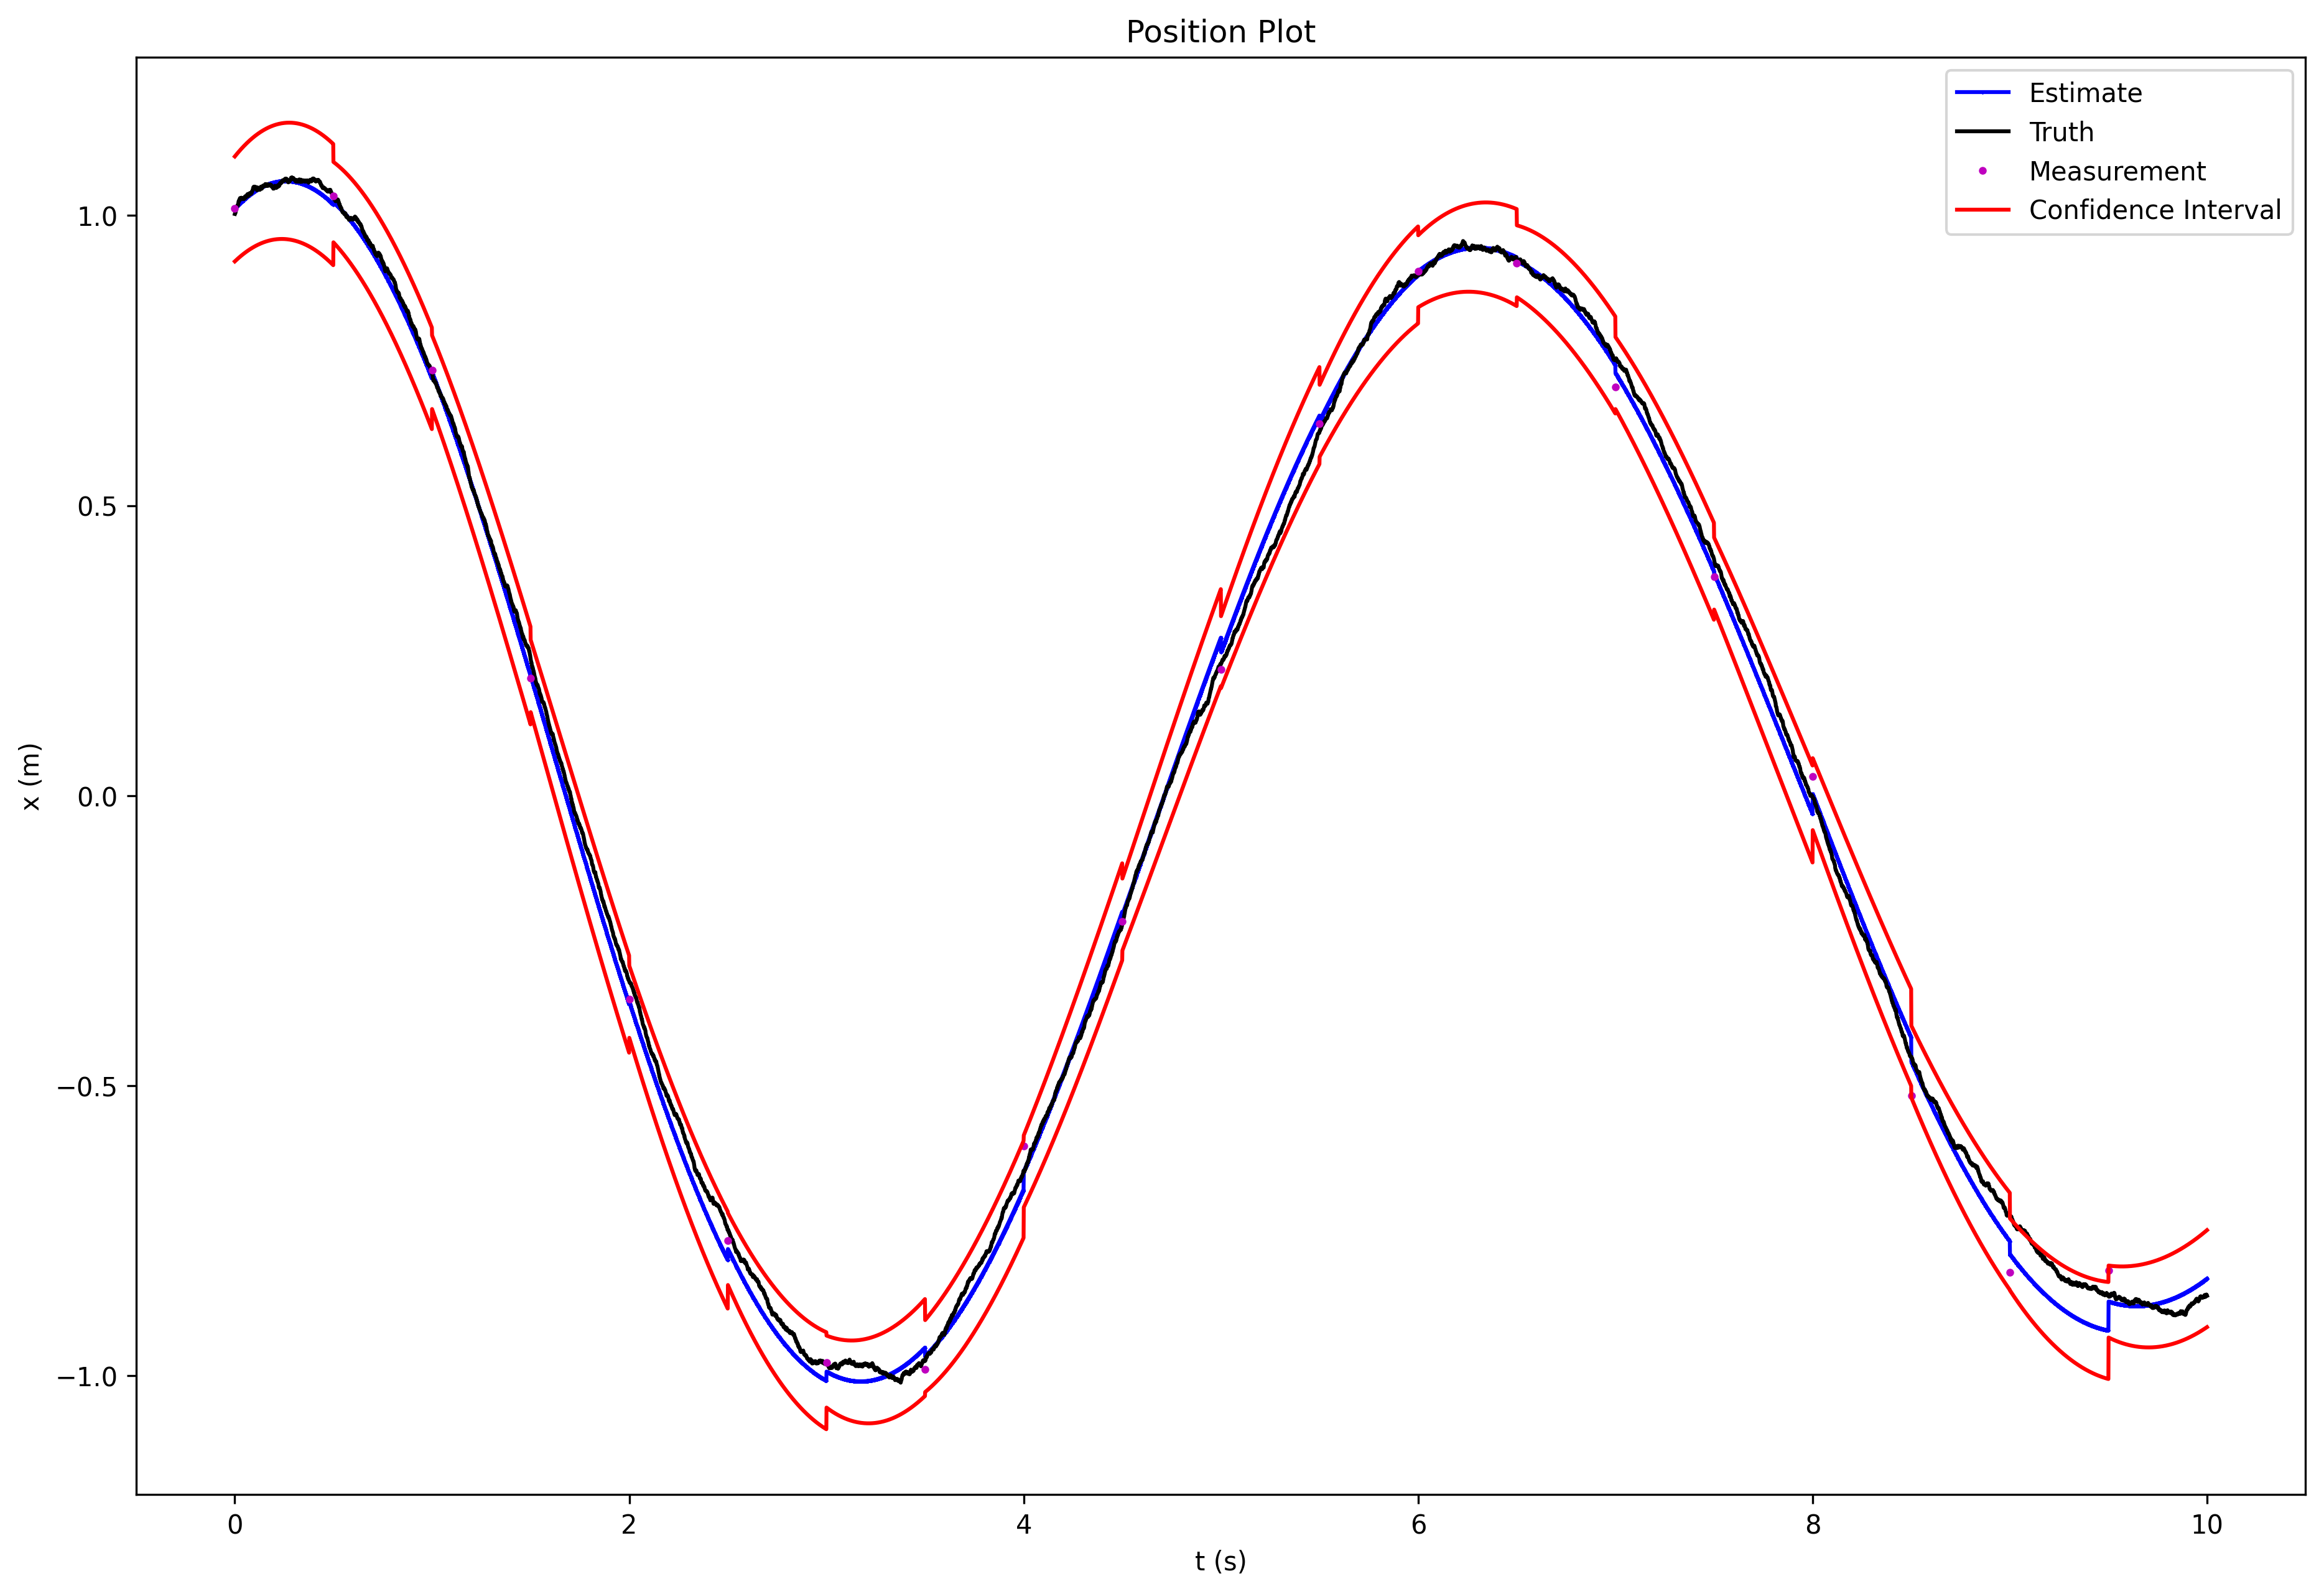

In [7]:
# Clear variables
# Enable interactive plots
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Clear plots
plt.close('all')

# Establish Dynamic System
h = np.array([0.4, 0.2, 0.7])  # [m,c,k]
dt = 1e-3  # propagation period
dn = 0.50  # measurement period
T = 10     # full time for simulation

saw = False

# Mass Spring Damper System
A = np.array([
    [0, 1],
    [-h[2]/h[0], -h[1]/h[0]]
])
B = np.array([
    [0],
    [1/h[0]]
])
F = np.eye(2) + A * dt
G = B * dt
H = np.eye(2)

# Initialize Kalman Filter
P = (1e-2) * np.eye(2) # covariance of estimates
Q = (1e-6) * np.eye(2) # uncertainty of dynamics (process)
R = (1e-3) * np.eye(2) # uncertainty of measurements

# Control gain
k = 0.2

# Simulate the system with the controller and the filter
X = []
Z = []
C = []
rr = []
Force  = []

u = 0
x_last = np.array([
    [1],
    [0.4]
])
P_last = P
r_last = x_last

for t in np.arange(0, T, dt):
    # Get the force input
    f = 1e-2 * np.sin(t) + u
    # f = u
    Force.append(f)
    # Predict
    x_next = F @ x_last + G * f
    P_next = F @ P_last @ F.T + Q

    # Truth
    r_next = F @ r_last + G * f + np.sqrt(Q[0, 0]) * np.random.randn(2,1)

    if t % dn < dt/10:  # Check if it's measurement time
        z = r_last + np.sqrt(R[0, 0]) * np.random.randn(2,1)
        Z.append(z)
        # Update
        z_err = z - H @ x_next

        if saw:
            z_err = 0.99 * z_err + 0.1*np.random.randn(2,1)

        S = H @ P_next @ H.T + R
        K = P_next @ H.T @ np.linalg.inv(S)
        x_next = x_next + K @ z_err
        P_next = (np.eye(2) - K @ H) @ P_next

    # Determine the control action
    pd = np.sin(0.9 * t)
    p = x_next[0].item()
    u = -k * (pd - p)

    # Update for sim
    x_last = x_next
    P_last = P_next
    r_last = r_next

    # Store data for plots
    X.append(x_next)
    C.append(P_next[0, 0])
    rr.append(r_next)

# Convert lists to arrays
X = np.array(X).squeeze()
Z = np.array(Z).squeeze()
C = np.array(C)
rr = np.array(rr).squeeze()
Force  = np.array(Force)

# Plot
plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
plt.plot(np.arange(0, T, dt), X[:, 0], 'b-*', markersize=1, label='Estimate')
plt.plot(np.arange(0, T, dt), rr[:, 0], 'k', label='Truth')
plt.plot(np.arange(0, T, dn), Z[:, 0], 'm', markersize=2, marker='o', linestyle='none', label='Measurement')
plt.plot(np.arange(0, T, dt), X[:, 0] + 3 * np.sqrt(C), 'r', label='Confidence Interval')
plt.plot(np.arange(0, T, dt), X[:, 0] - 3 * np.sqrt(C), 'r')
#plt.plot(np.arange(0, T, dt), np.sin(0.9 * np.arange(0, T, dt)), 'r', label='Desired position')
plt.title("Position Plot")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.legend()

#plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
#plt.plot(np.arange(0, T, dt), X[:, 1], 'b-*', markersize=1, label='Estimate')
#plt.plot(np.arange(0, T, dt), rr[:, 1], 'k', label='Truth')
#plt.plot(np.arange(0, T, dn), Z[:, 1], 'm', markersize=2, marker='o', linestyle='none', label='Measurement')
#plt.plot(np.arange(0, T, dt), X[:, 1] + 3 * np.sqrt(C), 'r', label='Confidence Interval')
#plt.plot(np.arange(0, T, dt), X[:, 1] - 3 * np.sqrt(C), 'r')
# plt.plot(np.arange(0, T, dt), np.sin(0.9 * np.arange(0, T, dt)), 'r', label='Desired Velocity')
#plt.title("Velocity Plot")
#plt.ylabel("v (m)")
#plt.xlabel("t (s)")
#plt.legend()

#plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
#plt.plot(np.arange(0, T, dt), Force, 'b-*', markersize=1, label='Force Input')
#plt.title("Actuation Plot")
#plt.ylabel("F (N)")
#plt.xlabel("t (s)")
#plt.legend()

plt.show()

In [8]:
import numpy as np 
from EKF_basic import EKF_Discrete
#TURTLEBOT TRNASITION EQUATIONS
def f_turtle(x, u):
    dxdt = np.zeros([3,1])
    dxdt[0] = u[0]*np.cos(x[2])
    dxdt[1] = u[0]*np.sin(x[2])
    dxdt[2] = u[1] 
    return x + dt * dxdt

def F_turtle( x, u ):
    d_dxdt_dx = np.zeros([3,3])
    d_dxdt_dx[0,2] = -u[0] * np.sin(x[2])
    d_dxdt_dx[1,2] =  u[0] * np.cos(x[2])
    return np.eye(3) + dt * d_dxdt_dx

def h_turtle( x ):
    return x 

def H_turtle( x ):
    return np.eye(3)


ModuleNotFoundError: No module named 'EKF_basic'

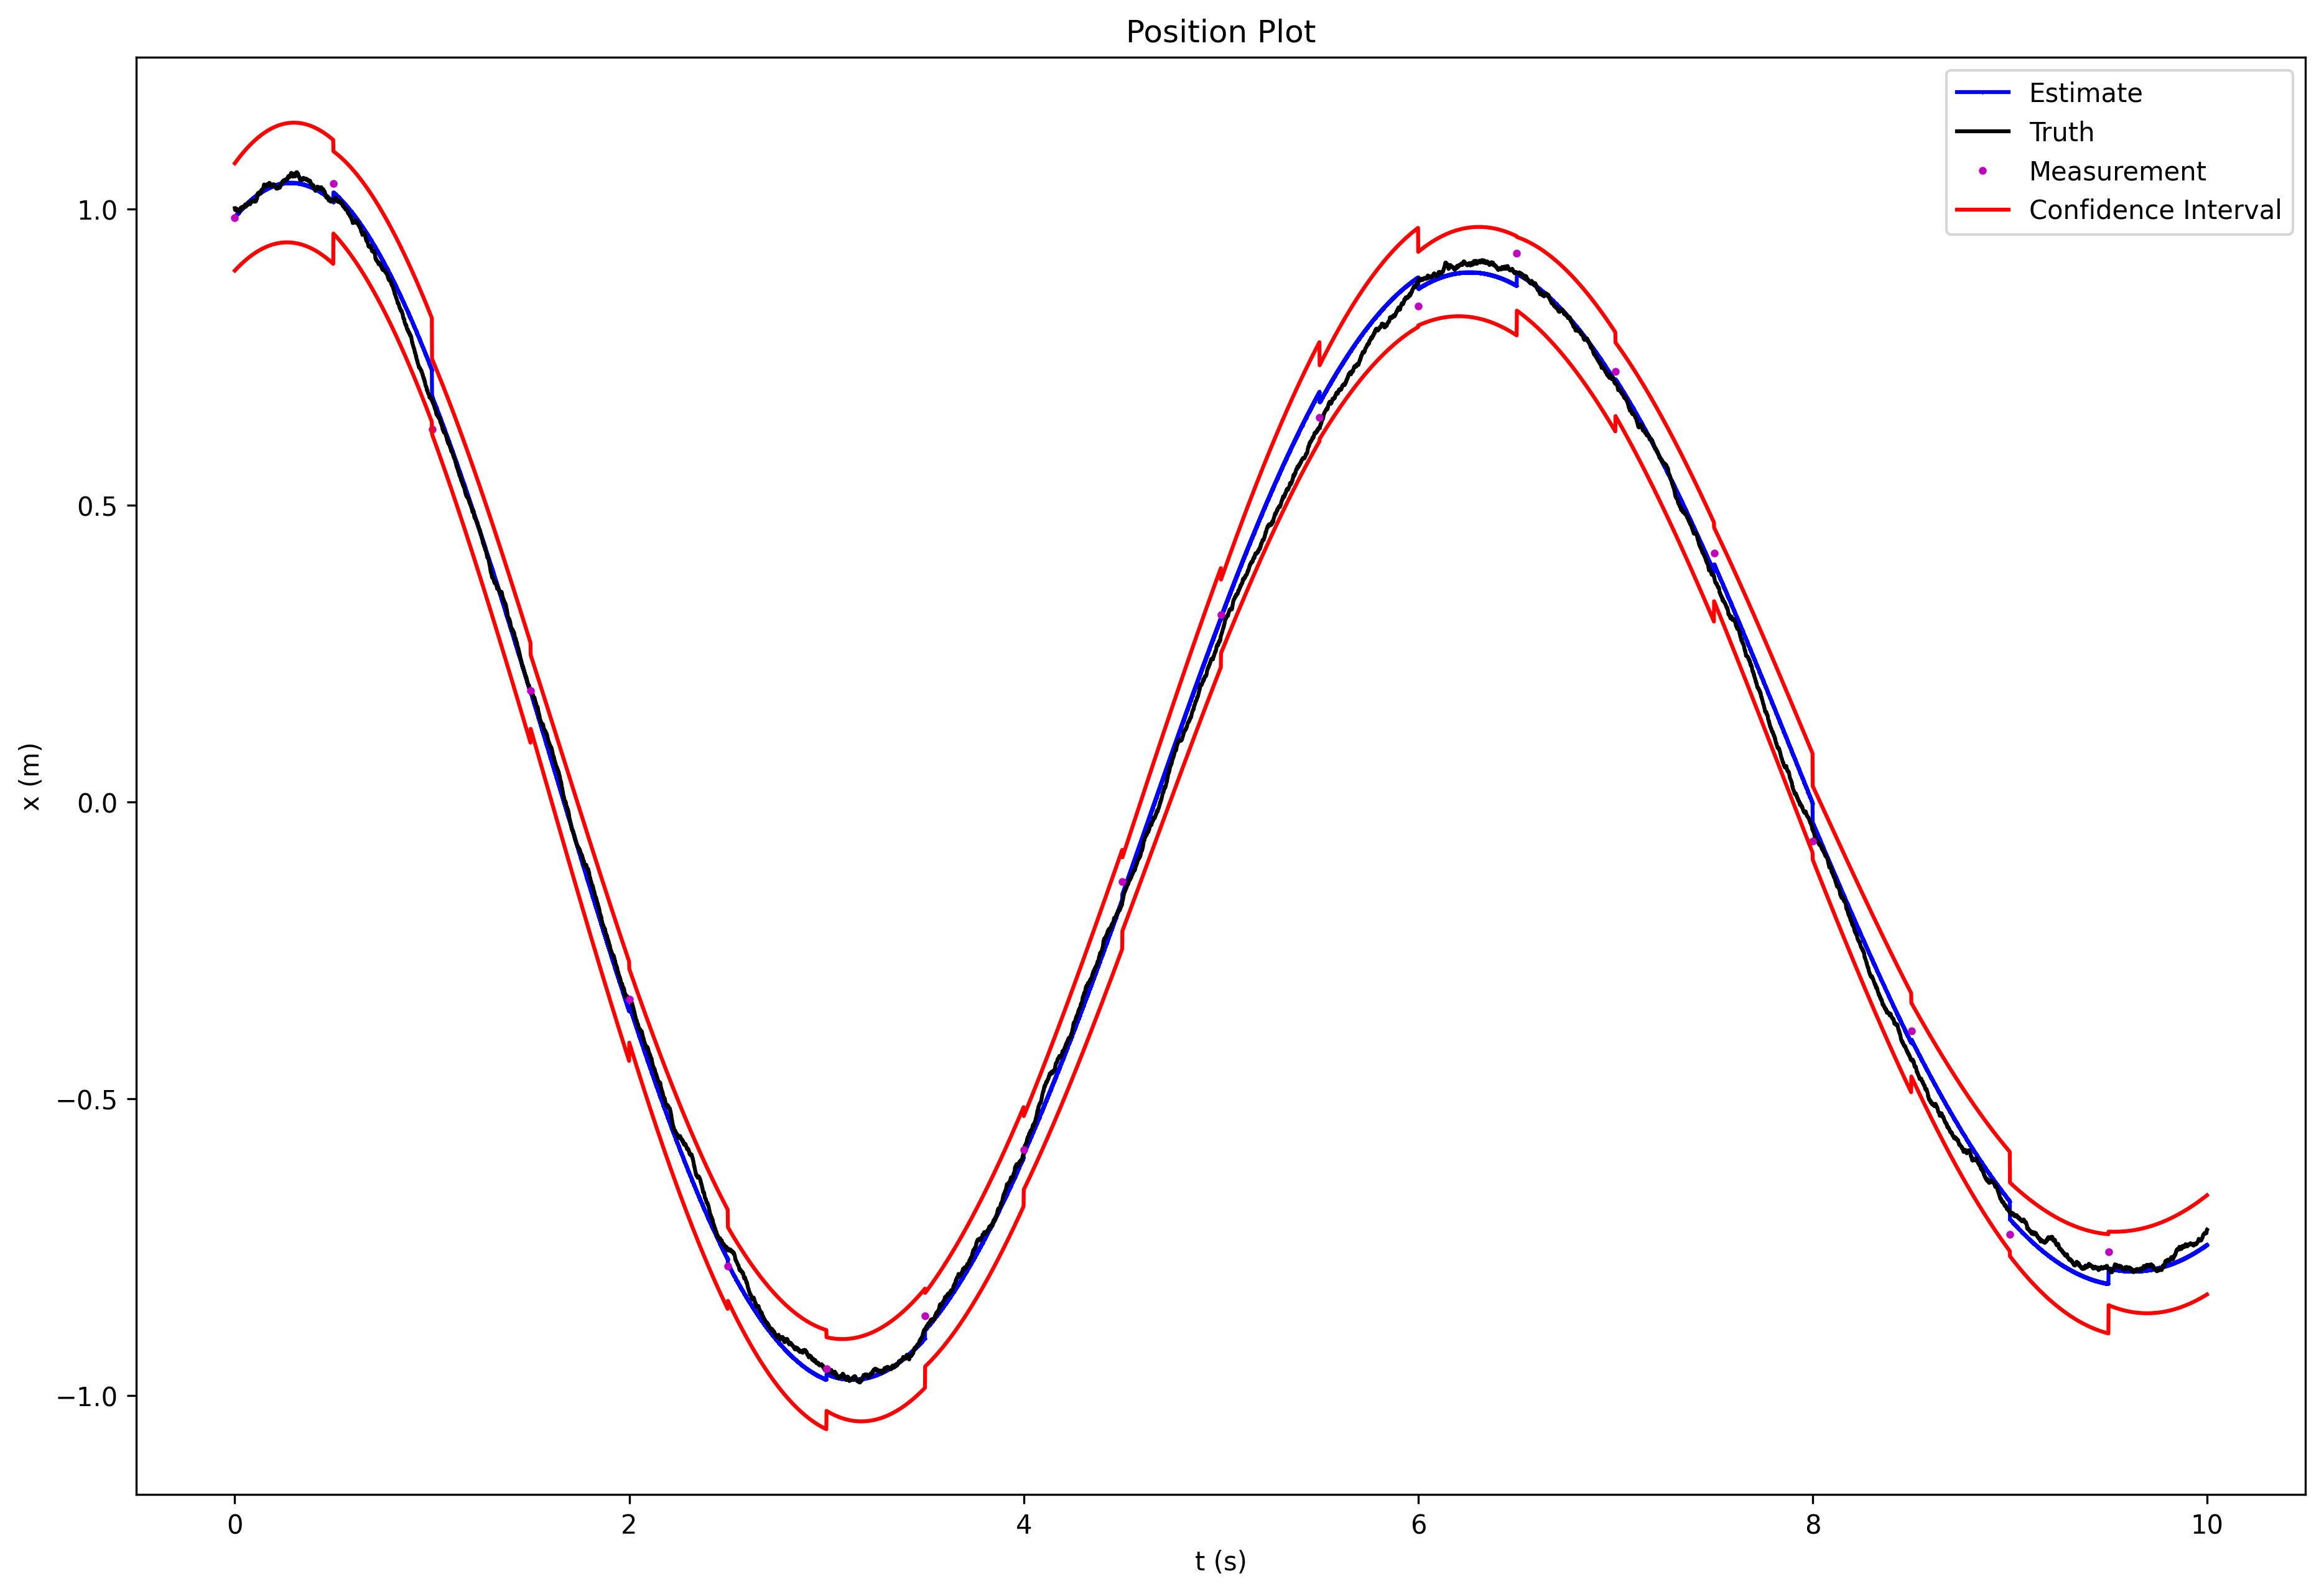

In [ ]:
# Clear variables
# Enable interactive plots
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from EKF_basic import EKF_Discrete
# Clear plots
plt.close('all')

# Establish Dynamic System
h = np.array([0.4, 0.2, 0.7])  # [m,c,k]
dt = 1e-3  # propagation period
dn = 0.50  # measurement period
T = 10     # full time for simulation

saw = False

# Mass Spring Damper System
A = np.array([
    [0, 1],
    [-h[2]/h[0], -h[1]/h[0]]
])
B = np.array([
    [0],
    [1/h[0]]
])
F = np.eye(2) + A * dt
G = B * dt
H = np.eye(2)

# Initialize Kalman Filter
P = (1e-2) * np.eye(2) # covariance of estimates
Q = (1e-6) * np.eye(2) # uncertainty of dynamics (process)
R = (1e-3) * np.eye(2) # uncertainty of measurements

# Control gain
k = 0.2

# Simulate the system with the controller and the filter
X = []
Z = []
C = []
rr = []
Force  = []

u = 0
x_last = np.array([
    [1],
    [0.4]
])
P_last = P
r_last = x_last

def f_cart( x, f ):
    h = np.array([0.4, 0.2, 0.7])  # [m,c,k]
    A = np.array([
    [0, 1],
    [-h[2]/h[0], -h[1]/h[0]] ])

    B = np.array([
    [0],
    [1/h[0]]])

    F = np.eye(2) + A * dt
    G = B * dt

    x_next =  F @ x_last + G * f
    return x_next

def F_cart( x, u ):
    h = np.array([0.4, 0.2, 0.7])  # [m,c,k]
    A = np.array([
    [0, 1],
    [-h[2]/h[0], -h[1]/h[0]] ])
    F = np.eye(2) + A * dt

    return F

def h_cart( x ):
    return x 

def H_cart( x ):
    return np.eye(2)

ekf_cart = EKF_Discrete(x_last, P, f_cart, F_cart, h_cart, H_cart, Q, R)

for t in np.arange(0, T, dt):
    # Get the force input
    f = 1e-2 * np.sin(t) + u
    # f = u
    Force.append(f)
    # # Predict
    # x_next = F @ x_last + G * f
    # P_next = F @ P_last @ F.T + Q
    x_next, P_next = ekf_cart.propagate( f )
    # Truth
    r_next = F @ r_last + G * f + np.sqrt(Q[0, 0]) * np.random.randn(2,1)

    if t % dn < dt/10:  # Check if it's measurement time
        z = r_last + np.sqrt(R[0, 0]) * np.random.randn(2,1)

        x_next, P_next = ekf_cart.update(z)
        Z.append(z)
        # # Update
        # z_err = z - H @ x_next

        # if saw:
        #     z_err = 0.99 * z_err + 0.1*np.random.randn(2,1)

        # S = H @ P_next @ H.T + R
        # K = P_next @ H.T @ np.linalg.inv(S)
        # x_next = x_next + K @ z_err
        # P_next = (np.eye(2) - K @ H) @ P_next

    # Determine the control action
    pd = np.sin(0.9 * t)
    p = x_next[0].item()
    u = -k * (pd - p)

    # Update for sim
    x_last = x_next
    P_last = P_next
    r_last = r_next

    # Store data for plots
    X.append(x_next)
    C.append(P_next[0, 0])
    rr.append(r_next)

# Convert lists to arrays
X = np.array(X).squeeze()
Z = np.array(Z).squeeze()
C = np.array(C)
rr = np.array(rr).squeeze()
Force  = np.array(Force)

# Plot
plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
plt.plot(np.arange(0, T, dt), X[:, 0], 'b-*', markersize=1, label='Estimate')
plt.plot(np.arange(0, T, dt), rr[:, 0], 'k', label='Truth')
plt.plot(np.arange(0, T, dn), Z[:, 0], 'm', markersize=2, marker='o', linestyle='none', label='Measurement')
plt.plot(np.arange(0, T, dt), X[:, 0] + 3 * np.sqrt(C), 'r', label='Confidence Interval')
plt.plot(np.arange(0, T, dt), X[:, 0] - 3 * np.sqrt(C), 'r')
#plt.plot(np.arange(0, T, dt), np.sin(0.9 * np.arange(0, T, dt)), 'r', label='Desired position')
plt.title("Position Plot")
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.legend()

# plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
# plt.plot(np.arange(0, T, dt), X[:, 1], 'b-*', markersize=1, label='Estimate')
# plt.plot(np.arange(0, T, dt), rr[:, 1], 'k', label='Truth')
# plt.plot(np.arange(0, T, dn), Z[:, 1], 'm', markersize=2, marker='o', linestyle='none', label='Measurement')
# plt.plot(np.arange(0, T, dt), X[:, 1] + 3 * np.sqrt(C), 'r', label='Confidence Interval')
# plt.plot(np.arange(0, T, dt), X[:, 1] - 3 * np.sqrt(C), 'r')
# plt.plot(np.arange(0, T, dt), np.sin(0.9 * np.arange(0, T, dt)), 'r', label='Desired Velocity')
# plt.title("Velocity Plot")
# plt.ylabel("v (m)")
# plt.xlabel("t (s)")
# plt.legend()

# plt.figure(figsize=(15, 10), dpi=300)  # Increase figure size and DPI
# plt.plot(np.arange(0, T, dt), Force, 'b-*', markersize=1, label='Force Input')
# plt.title("Actuation Plot")
# plt.ylabel("F (N)")
# plt.xlabel("t (s)")
# plt.legend()

plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean vector
mean = [0, 0]

# Define the covariance matrix
cov = [[1, 0.5], [0.5, 1]]  # Diagonal covariance, points lie on x or y-axis

# Number of samples to generate
num_samples = 1

# Generate samples
sample = np.random.multivariate_normal(mean, cov, num_samples).T

# Print the generated sample
print("Generated sample:", sample)
print("Shape of the sample array:", sample.shape)

# # Plot the sample
# plt.scatter(sample[:, 0], sample[:, 1], alpha=0.6)
# plt.title('Sample from Multivariate Gaussian Distribution')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.axis('equal')  # Equal scaling for x and y axes
# plt.show()
np.array([ [1], [1]
]) + sample

Generated sample: [[-0.50470838]
 [ 0.84807463]]
Shape of the sample array: (2, 1)


array([[0.49529162],
       [1.84807463]])